In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [39]:
df=pd.read_csv("Student Attitude and Behavior.csv")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Certification Course                                    235 non-null    object 
 1   Gender                                                  235 non-null    object 
 2   Department                                              235 non-null    object 
 3   Height(CM)                                              235 non-null    float64
 4   Weight(KG)                                              235 non-null    float64
 5   10th Mark                                               235 non-null    float64
 6   12th Mark                                               235 non-null    float64
 7   college mark                                            235 non-null    float64
 8   hobbies                                 

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height(CM),235.0,157.402128,21.510805,4.5,152.0,160.0,170.00,192.0
Weight(KG),235.0,60.803830,14.895844,20.0,50.0,60.0,70.00,106.0
10th Mark,235.0,76.848511,13.047560,7.4,70.0,80.0,86.25,98.0
12th Mark,235.0,68.775872,11.018192,45.0,60.0,69.0,76.00,94.0
college mark,235.0,70.660553,15.727446,1.0,60.0,70.0,80.00,100.0
salary expectation,235.0,32481.680851,111314.628933,0.0,15000.0,20000.0,25000.00,1500000.0


<Axes: xlabel='12th Mark', ylabel='Count'>

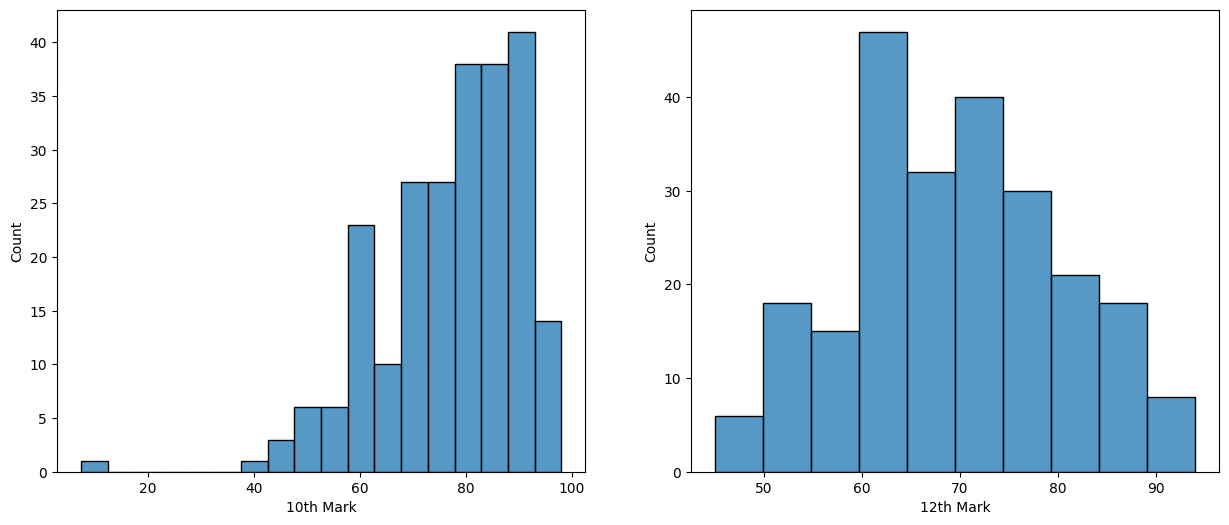

In [42]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df,x="10th Mark")
plt.subplot(1, 2, 2)
sns.histplot(data=df,x="12th Mark")

In [43]:
hobbies_counts = df['hobbies'].value_counts()

In [44]:
hobbies_counts

hobbies
Sports           85
Cinema           78
Video Games      36
Reading books    36
Name: count, dtype: int64

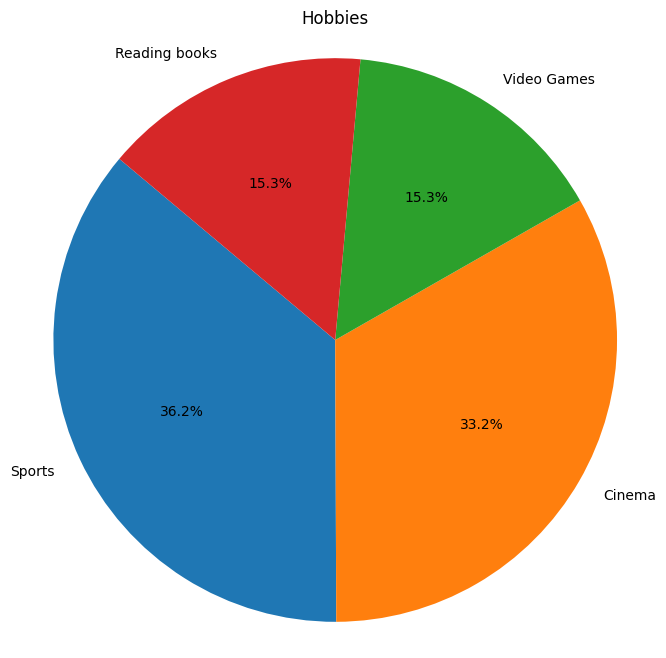

In [45]:
plt.figure(figsize=(8, 8))
plt.pie(hobbies_counts, labels=hobbies_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Hobbies')
plt.axis('equal')
plt.show()

In [46]:
part_time_count = df['part-time job'].value_counts()

In [47]:
part_time_count

part-time job
No     194
Yes     41
Name: count, dtype: int64

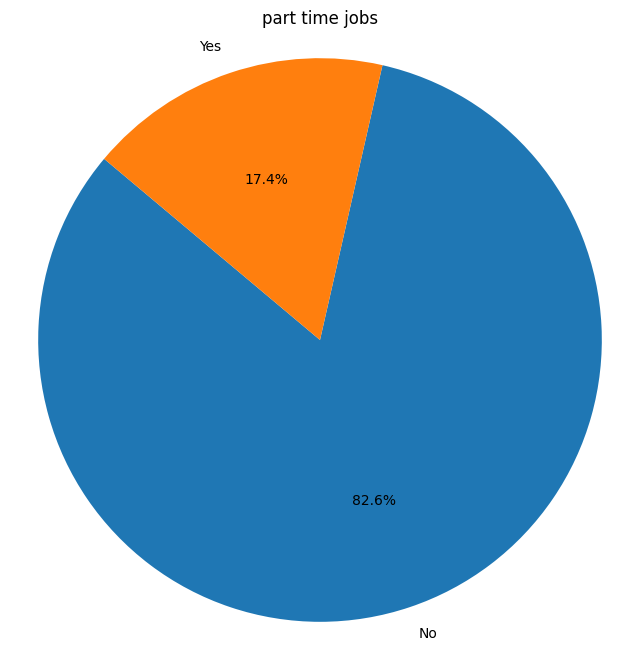

In [48]:
plt.figure(figsize=(8, 8))
plt.pie(part_time_count, labels=part_time_count.index, autopct='%1.1f%%', startangle=140)
plt.title('part time jobs')
plt.axis('equal')
plt.show()

In [49]:
# College mark group bt Students Stress Level
df_stress = df.groupby(["Stress Level "]).agg({"college mark":["mean","median"]})
df_stress.columns = ['Mean College Mark', 'Median College Mark']

In [50]:
df_stress

,Mean College Mark,Median College Mark
Stress Level,,
Awful,70.263158,70.0
Bad,68.754412,70.0
Good,71.539635,75.0
fabulous,72.181818,75.0


In [51]:
fig = px.bar(df_stress, x=df_stress.index, y=['Mean College Mark', 'Median College Mark'],
             title='College Marks by Stress Level',
             labels={'Stress Level': 'Stress Level', 'value': 'College Mark', 'variable': 'Statistic'},
             barmode='group')  # Gruplar arası çubukları grupla

# Grafik gösterme
fig.show()

In [52]:
df.columns

Index(['Certification Course', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10th Mark', '12th Mark', 'college mark', 'hobbies',
       'daily studing time', 'prefer to study in', 'salary expectation',
       'Do you like your degree?',
       'willingness to pursue a career based on their degree  ',
       'social medai & video', 'Travelling Time ', 'Stress Level ',
       'Financial Status', 'part-time job'],
      dtype='object')

In [53]:
fig = px.histogram(df, x="Height(CM)",color="Gender",text_auto=True,title="Height Histogram")
fig.show()

In [54]:
fig = px.histogram(df, x="Weight(KG)",color="Gender",text_auto=True,title="Height Histogram")
fig.show()